In [1]:
import pandas as pd
import numpy as np
from scipy import stats # For t-tests and chi-squared tests
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Dataset ---

In [2]:
# Read the data that is inside of the CSV
df = pd.read_csv("./Health_Data/cleaned_health.csv")
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,52,1,125,212,0,1,168,0,1.0,2,2,3,0,1,0,0,0
1,53,1,140,203,1,0,155,1,3.1,0,0,3,0,1,0,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,3,0,1,0,0,0
3,61,1,148,203,0,1,161,0,0.0,2,1,3,0,1,0,0,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,120,211,0,0,115,0,1.5,1,0,2,1,0,0,1,0
298,44,0,108,141,0,1,175,0,0.6,1,0,2,1,0,0,1,0
299,52,1,128,255,0,1,161,1,0.0,2,1,3,0,1,0,0,0
300,59,1,160,273,0,0,125,0,0.0,2,0,2,0,0,0,0,1


In [3]:
# Define numerical columns for t-tests
NUMERICAL_COLS_FOR_TESTING = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Define categorical columns for chi-squared tests (including the one-hot encoded cp columns)
CATEGORICAL_COLS_FOR_TESTING = [
    'sex', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
    'cp_0', 'cp_1', 'cp_2', 'cp_3'
]
TARGET_COL = 'target' # The column indicating disease presence (0 or 1)

# --- 2. Data Preprocessing (Ensuring Cleanliness and Correct Types) ---

In [4]:
print("\n--- Data Preprocessing for Hypothesis Testing ---")

# Handle '?' or other non-numeric values if they exist, converting to NaN first
df.replace('?', np.nan, inplace=True)
df.replace('N/A', np.nan, inplace=True)

# Convert all relevant columns to numeric, coercing errors
all_relevant_cols = NUMERICAL_COLS_FOR_TESTING + CATEGORICAL_COLS_FOR_TESTING + [TARGET_COL]
for col in all_relevant_cols:
    if col in df.columns:
        if col in NUMERICAL_COLS_FOR_TESTING:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else: # Categorical/binary features including target
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64') # Use nullable integer

# Impute missing values after type conversion
print("Missing values before imputation for hypothesis testing:")
print(df[all_relevant_cols].isnull().sum()[df[all_relevant_cols].isnull().sum() > 0])

for col in all_relevant_cols:
    if col in df.columns and df[col].isnull().any():
        if col in NUMERICAL_COLS_FOR_TESTING:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in '{col}' with its median ({median_val}).")
        else: # Categorical/binary features including target
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled missing values in '{col}' with its mode ({mode_val}).")

print("\nMissing values after imputation for hypothesis testing:")
print(df[all_relevant_cols].isnull().sum())

# Ensure the target column is present and binary
if TARGET_COL not in df.columns or df[TARGET_COL].nunique() != 2:
    print(f"Error: The target column '{TARGET_COL}' is missing or not binary. Cannot perform tests against target.")
    exit()


--- Data Preprocessing for Hypothesis Testing ---
Missing values before imputation for hypothesis testing:
Series([], dtype: int64)

Missing values after imputation for hypothesis testing:
age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
sex         0
fbs         0
restecg     0
exang       0
slope       0
ca          0
thal        0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
target      0
dtype: int64


# --- 3. Independent Samples T-test ---


--- Independent Samples T-tests (Numerical Feature vs. Target) ---

Comparing 'age' between Target 0 (No Disease) and Target 1 (Disease):
  Mean for Target 0: 56.60
  Mean for Target 1: 52.59
  T-statistic: 3.994
  P-value: 0.0001
  Conclusion: Reject the null hypothesis. There is a statistically significant difference in 'age' between the two target groups (p < 0.05).


C:\Users\lualg\AppData\Local\Temp\ipykernel_35028\397220064.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=num_col, data=df, palette='pastel')


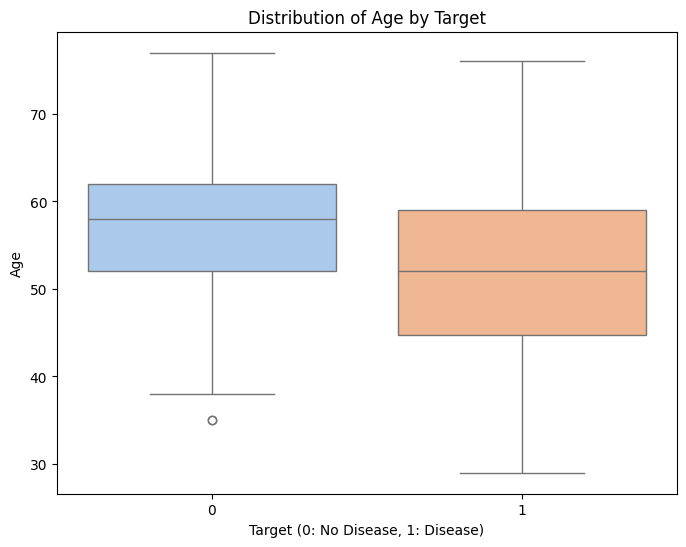


Comparing 'trestbps' between Target 0 (No Disease) and Target 1 (Disease):
  Mean for Target 0: 134.40
  Mean for Target 1: 129.25
  T-statistic: 2.529
  P-value: 0.0120
  Conclusion: Reject the null hypothesis. There is a statistically significant difference in 'trestbps' between the two target groups (p < 0.05).


C:\Users\lualg\AppData\Local\Temp\ipykernel_35028\397220064.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=num_col, data=df, palette='pastel')


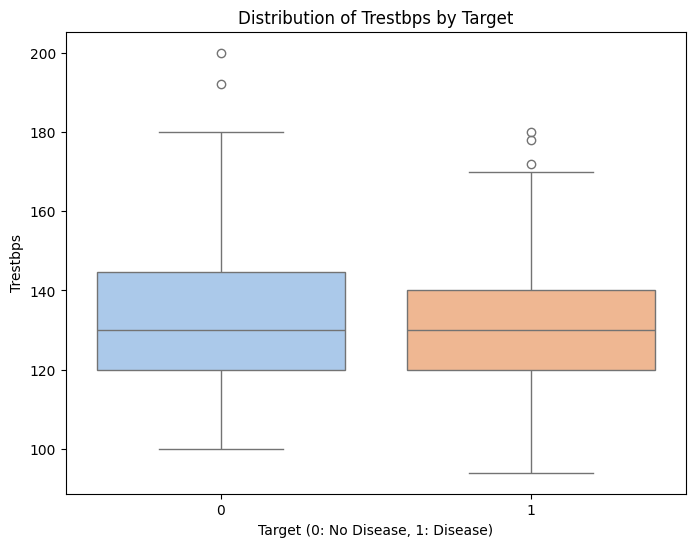


Comparing 'chol' between Target 0 (No Disease) and Target 1 (Disease):
  Mean for Target 0: 251.09
  Mean for Target 1: 242.64
  T-statistic: 1.425
  P-value: 0.1553
  Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in 'chol' between the two target groups (p >= 0.05).


C:\Users\lualg\AppData\Local\Temp\ipykernel_35028\397220064.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=num_col, data=df, palette='pastel')


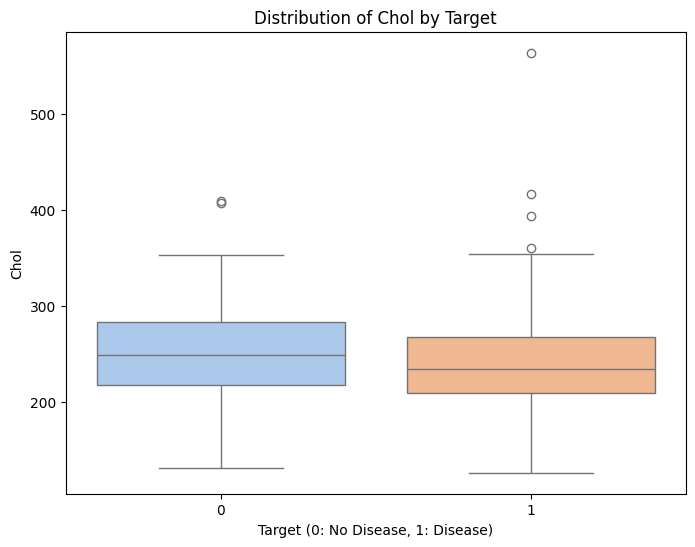


Comparing 'thalach' between Target 0 (No Disease) and Target 1 (Disease):
  Mean for Target 0: 139.10
  Mean for Target 1: 158.38
  T-statistic: -7.904
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant difference in 'thalach' between the two target groups (p < 0.05).


C:\Users\lualg\AppData\Local\Temp\ipykernel_35028\397220064.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=num_col, data=df, palette='pastel')


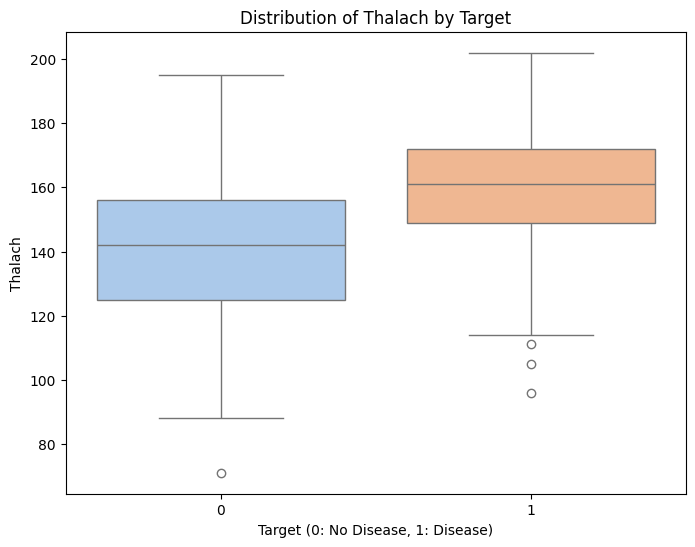


Comparing 'oldpeak' between Target 0 (No Disease) and Target 1 (Disease):
  Mean for Target 0: 1.59
  Mean for Target 1: 0.59
  T-statistic: 7.902
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant difference in 'oldpeak' between the two target groups (p < 0.05).


C:\Users\lualg\AppData\Local\Temp\ipykernel_35028\397220064.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=num_col, data=df, palette='pastel')


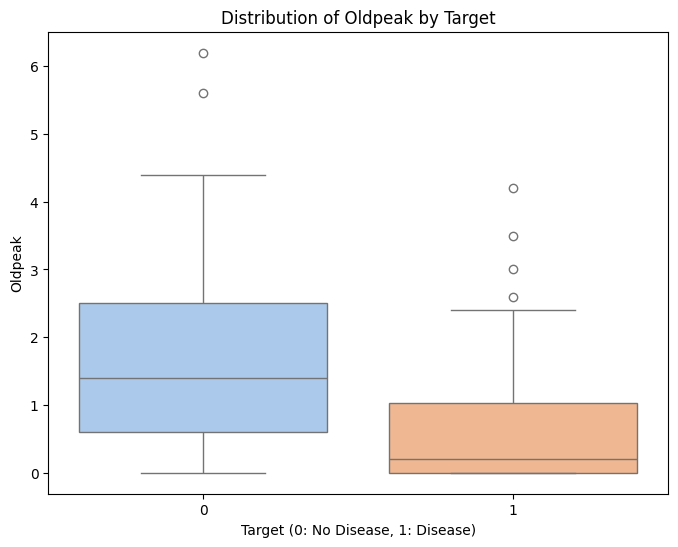

In [5]:
print("\n--- Independent Samples T-tests (Numerical Feature vs. Target) ---")
alpha = 0.05 # Significance level

for num_col in NUMERICAL_COLS_FOR_TESTING:
    if num_col in df.columns:
        # Separate data into two groups based on the target variable
        group_0 = df[df[TARGET_COL] == 0][num_col]
        group_1 = df[df[TARGET_COL] == 1][num_col]

        # Perform independent samples t-test
        # equal_var=False for Welch's t-test, which does not assume equal population variance
        t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False, nan_policy='omit')

        print(f"\nComparing '{num_col}' between Target 0 (No Disease) and Target 1 (Disease):")
        print(f"  Mean for Target 0: {group_0.mean():.2f}")
        print(f"  Mean for Target 1: {group_1.mean():.2f}")
        print(f"  T-statistic: {t_stat:.3f}")
        print(f"  P-value: {p_value:.4f}")

        if p_value < alpha:
            print(f"  Conclusion: Reject the null hypothesis. There is a statistically significant difference in '{num_col}' between the two target groups (p < {alpha}).")
        else:
            print(f"  Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in '{num_col}' between the two target groups (p >= {alpha}).")

        # Visualization for T-test
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=TARGET_COL, y=num_col, data=df, palette='pastel')
        plt.title(f'Distribution of {num_col.replace("_", " ").title()} by {TARGET_COL.replace("_", " ").title()}')
        plt.xlabel(f'{TARGET_COL.replace("_", " ").title()} (0: No Disease, 1: Disease)')
        plt.ylabel(num_col.replace("_", " ").title())
        plt.show()
    else:
        print(f"Warning: Numerical column '{num_col}' not found in DataFrame. Skipping t-test.")

# --- 4. Chi-squared Test of Independence ---


--- Chi-squared Tests of Independence (Categorical Feature vs. Target) ---

Testing association between 'sex' and 'target':
  Contingency Table:
target    0   1
sex            
0        24  72
1       114  92
  Chi-squared statistic: 23.084
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'sex' and 'target' (p < 0.05).


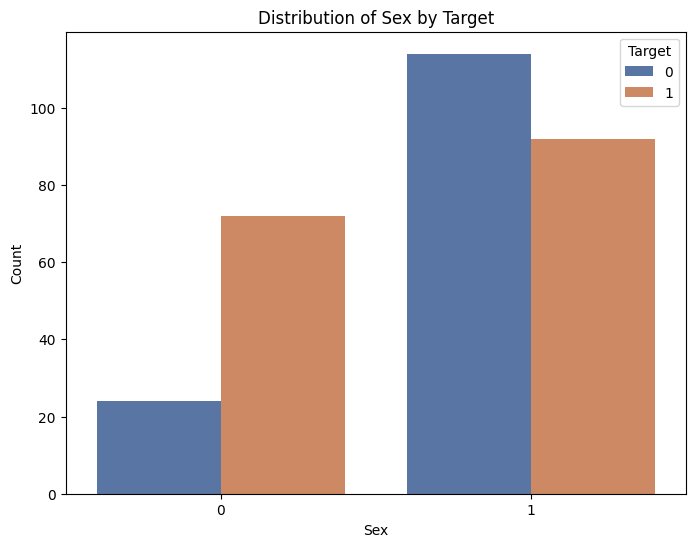


Testing association between 'fbs' and 'target':
  Contingency Table:
target    0    1
fbs             
0       116  141
1        22   23
  Chi-squared statistic: 0.092
  P-value: 0.7611
  Conclusion: Fail to reject the null hypothesis. There is no statistically significant association between 'fbs' and 'target' (p >= 0.05).


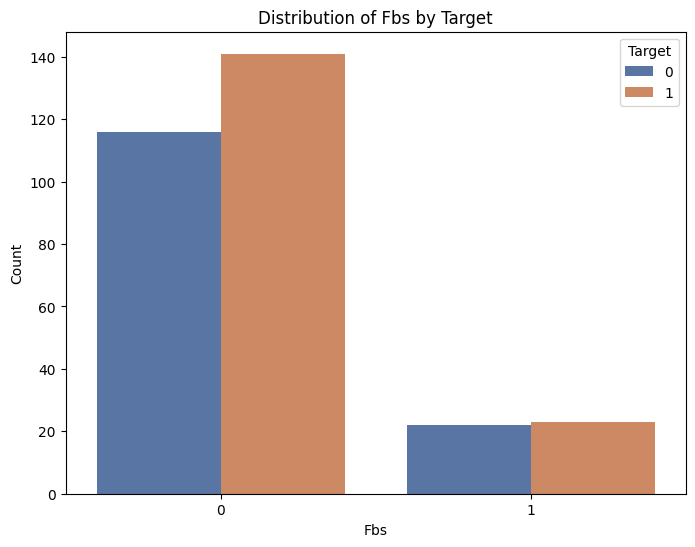


Testing association between 'restecg' and 'target':
  Contingency Table:
target    0   1
restecg        
0        79  68
1        56  95
2         3   1
  Chi-squared statistic: 9.730
  P-value: 0.0077
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'restecg' and 'target' (p < 0.05).


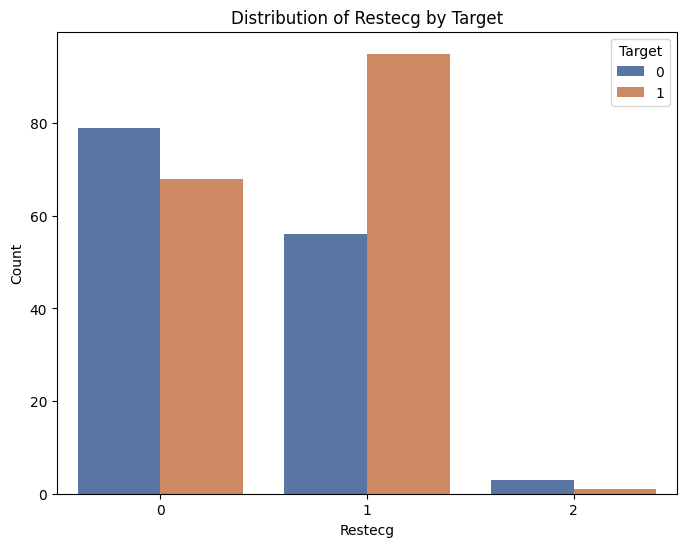


Testing association between 'exang' and 'target':
  Contingency Table:
target   0    1
exang          
0       62  141
1       76   23
  Chi-squared statistic: 55.456
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'exang' and 'target' (p < 0.05).


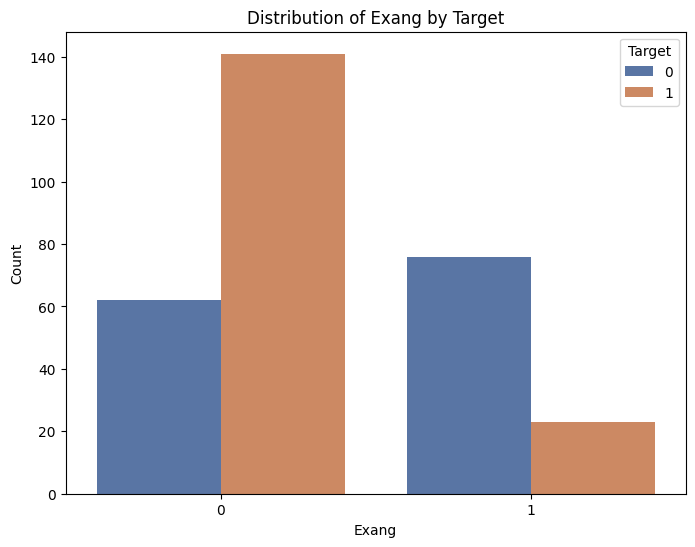


Testing association between 'slope' and 'target':
  Contingency Table:
target   0    1
slope          
0       12    9
1       91   49
2       35  106
  Chi-squared statistic: 46.889
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'slope' and 'target' (p < 0.05).


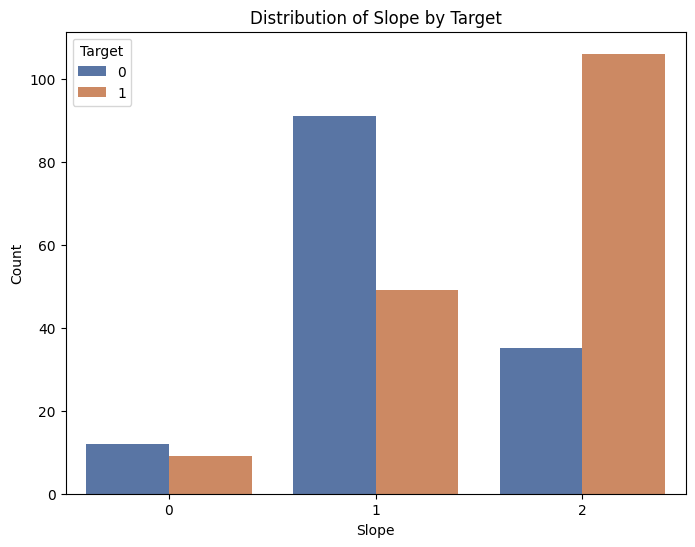


Testing association between 'ca' and 'target':
  Contingency Table:
target   0    1
ca             
0       45  130
1       44   21
2       31    7
3       17    3
4        1    3
  Chi-squared statistic: 73.690
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'ca' and 'target' (p < 0.05).


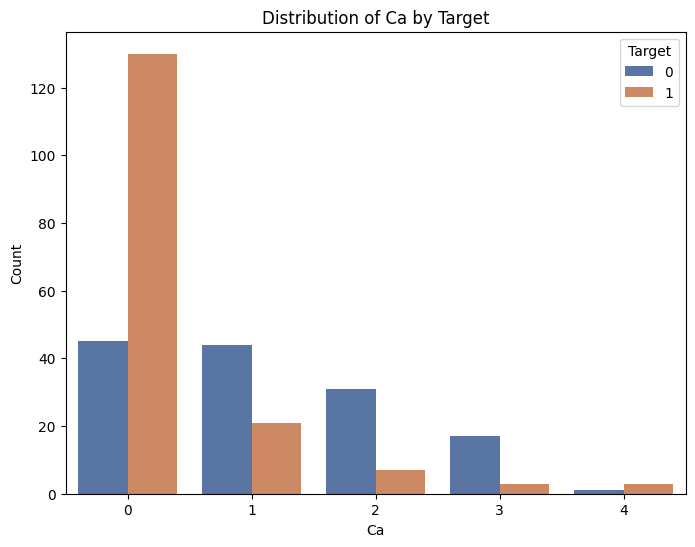


Testing association between 'thal' and 'target':
  Contingency Table:
target   0    1
thal           
0        1    1
1       12    6
2       36  129
3       89   28
  Chi-squared statistic: 84.610
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'thal' and 'target' (p < 0.05).


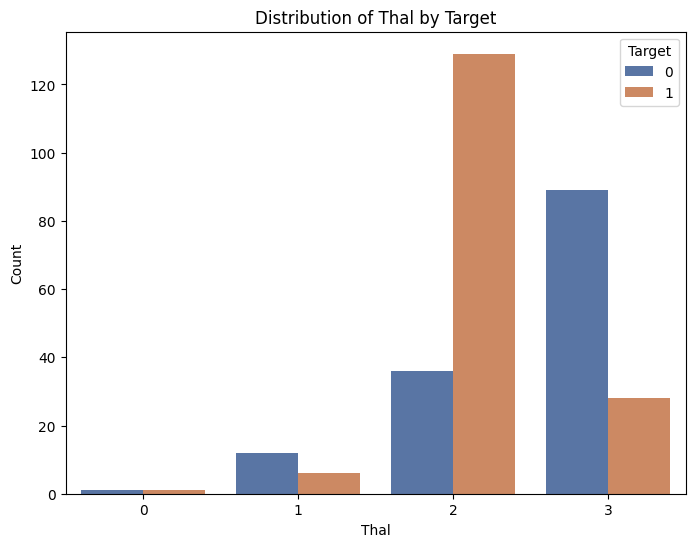


Testing association between 'cp_0' and 'target':
  Contingency Table:
target    0    1
cp_0            
0        34  125
1       104   39
  Chi-squared statistic: 77.926
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'cp_0' and 'target' (p < 0.05).


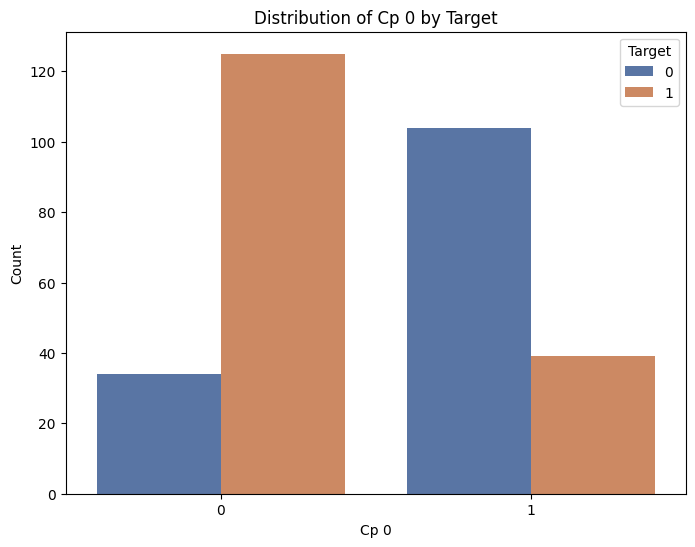


Testing association between 'cp_1' and 'target':
  Contingency Table:
target    0    1
cp_1            
0       129  123
1         9   41
  Chi-squared statistic: 17.208
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'cp_1' and 'target' (p < 0.05).


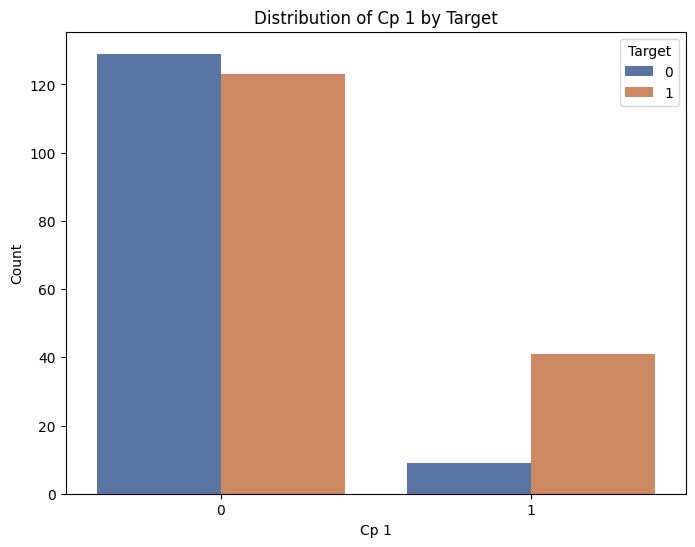


Testing association between 'cp_2' and 'target':
  Contingency Table:
target    0   1
cp_2           
0       120  96
1        18  68
  Chi-squared statistic: 28.339
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a statistically significant association between 'cp_2' and 'target' (p < 0.05).


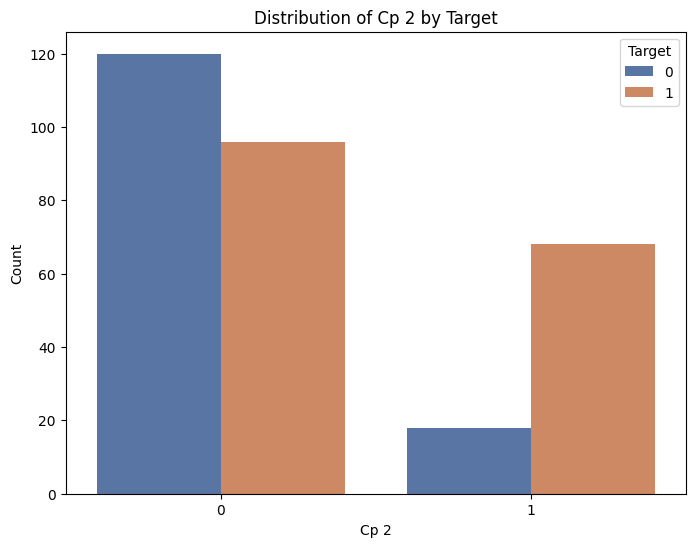


Testing association between 'cp_3' and 'target':
  Contingency Table:
target    0    1
cp_3            
0       131  148
1         7   16
  Chi-squared statistic: 1.718
  P-value: 0.1899
  Conclusion: Fail to reject the null hypothesis. There is no statistically significant association between 'cp_3' and 'target' (p >= 0.05).


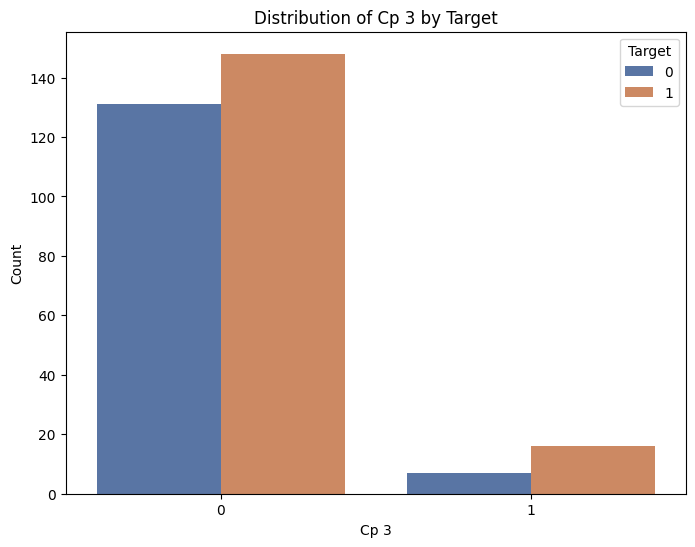

In [6]:
print("\n--- Chi-squared Tests of Independence (Categorical Feature vs. Target) ---")
alpha = 0.05 # Significance level

for cat_col in CATEGORICAL_COLS_FOR_TESTING:
    if cat_col in df.columns:
        # Create a contingency table
        contingency_table = pd.crosstab(df[cat_col], df[TARGET_COL])

        # Ensure the contingency table is not empty and has at least 2x2 dimensions for chi-squared
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

            print(f"\nTesting association between '{cat_col}' and '{TARGET_COL}':")
            print("  Contingency Table:")
            print(contingency_table)
            print(f"  Chi-squared statistic: {chi2:.3f}")
            print(f"  P-value: {p_value:.4f}")

            if p_value < alpha:
                print(f"  Conclusion: Reject the null hypothesis. There is a statistically significant association between '{cat_col}' and '{TARGET_COL}' (p < {alpha}).")
            else:
                print(f"  Conclusion: Fail to reject the null hypothesis. There is no statistically significant association between '{cat_col}' and '{TARGET_COL}' (p >= {alpha}).")

            # Visualization for Chi-squared test
            plt.figure(figsize=(8, 6))
            sns.countplot(x=cat_col, hue=TARGET_COL, data=df, palette='deep')
            plt.title(f'Distribution of {cat_col.replace("_", " ").title()} by {TARGET_COL.replace("_", " ").title()}')
            plt.xlabel(cat_col.replace("_", " ").title())
            plt.ylabel('Count')
            plt.legend(title=f'{TARGET_COL.replace("_", " ").title()}')
            plt.show()
        else:
            print(f"Warning: Contingency table for '{cat_col}' and '{TARGET_COL}' is too small for Chi-squared test (needs at least 2x2). Skipping.")
    else:
        print(f"Warning: Categorical column '{cat_col}' not found in DataFrame. Skipping chi-squared test.")

In [7]:
print("\nHypothesis testing complete. Results and visualizations displayed.")


Hypothesis testing complete. Results and visualizations displayed.
